In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [2]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory = '/data/project/general/aerosolretriev'

In [101]:
#plot_dir =  directory +'/aerosol_results/forward_model_phase_noise_small_drop0/plots/hyperparameter_scans'
plot_dir =  directory +'/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [102]:
result_dir =  directory +'/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1'


In [103]:
model_dir =  directory +'/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Load data

In [104]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [105]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [106]:
df

MAE_train    MAE_val  MAPE_train  MAPE_val    MSE_train      MSE_val  \
0   25.323090  25.826068    8.869775  9.090384  4418.292420  4543.258006   
1   32.094133  32.641924    8.324400  8.333083  6959.937822  6975.468720   
2   20.886646  21.319761    7.623561  7.299950  3616.848746  3736.159985   
3   21.642032  22.573736    6.983339  6.319693  3573.282587  3810.696782   
4   26.128209  27.249048    7.932288  7.272345  4412.543873  4741.875975   
5   26.648697  27.487148    7.134079  7.095872  4894.289702  5282.568245   
6   26.256152  26.629467    6.349438  7.006263  5252.390525  5312.269880   
7   20.510969  21.032101    5.921069  6.811678  3528.948643  3617.917887   
8   18.457456  19.127425    5.877364  6.280912  3063.968049  3384.448698   
9   21.000260  21.546487    6.065830  6.986031  3546.189374  3886.693369   
10  16.892779  18.005789    6.195914  7.467550  2634.639373  3190.608851   
11  15.591402  16.483005    6.237543  7.696086  2413.334562  2890.435047   
12  14.068053  15.156775    6.159297  7.774819  1958.242681  2444.926602   
13  15.121700  16.366803    5.572642  6.648687  1890.699744  2434.052996   
14  15.946773  17.216952    5.943036  6.953195  1850.126189  2446.097993   
15  17.830565  19.198316    6.243340  7.029636  2367.404646  2914.671976   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            9.194321                         9.100940   
1                           10.511631                        10.191580   
2                            8.099317                         8.146341   
3                            6.770098                         6.869195   
4                            7.567605                         7.582113   
5                            6.915642                         6.848742   
6                            7.197050                         6.912783   
7                            6.226028                         6.034746   
8                            6.284560                         6.129886   
9                            6.737303                         6.692106   
10                           5.627513                         5.608696   
11                           5.816261                         5.701652   
12                           6.407612                         6.134796   
13                           6.053716                         5.967535   
14                           5.627315                         5.587991   
15                           5.476734                         5.656990   

    90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                       35.375767                    35.386323  ...   
1                       31.584043                    31.677771  ...   
2                       28.657214                    28.324768  ...   
3                       32.079278                    31.784622  ...   
4                       34.686868                    34.962222  ...   
5                       29.324599                    29.821104  ...   
6                       28.988736                    32.592661  ...   
7                       28.684418                    30.357042  ...   
8                       28.183606                    28.799967  ...   
9                       32.411449                    30.926984  ...   
10                      28.361778                    29.336150  ...   
11                      32.188359                    32.231299  ...   
12                      30.025906                    31.630137  ...   
13                      24.730746                    25.034681  ...   
14                      24.526187                    25.193762  ...   
15                      24.884371                    25.980824  ...   

    config/epochs  config/learning_rate  config/loss  \
0             200              0.000098          MSE   
1             200              0.000098          MSE   
2             200              0.000098          MSE   
3             200   

# Plot

## Generalisation of adjusted $R^2$

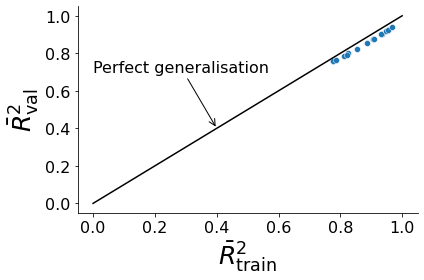

In [107]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

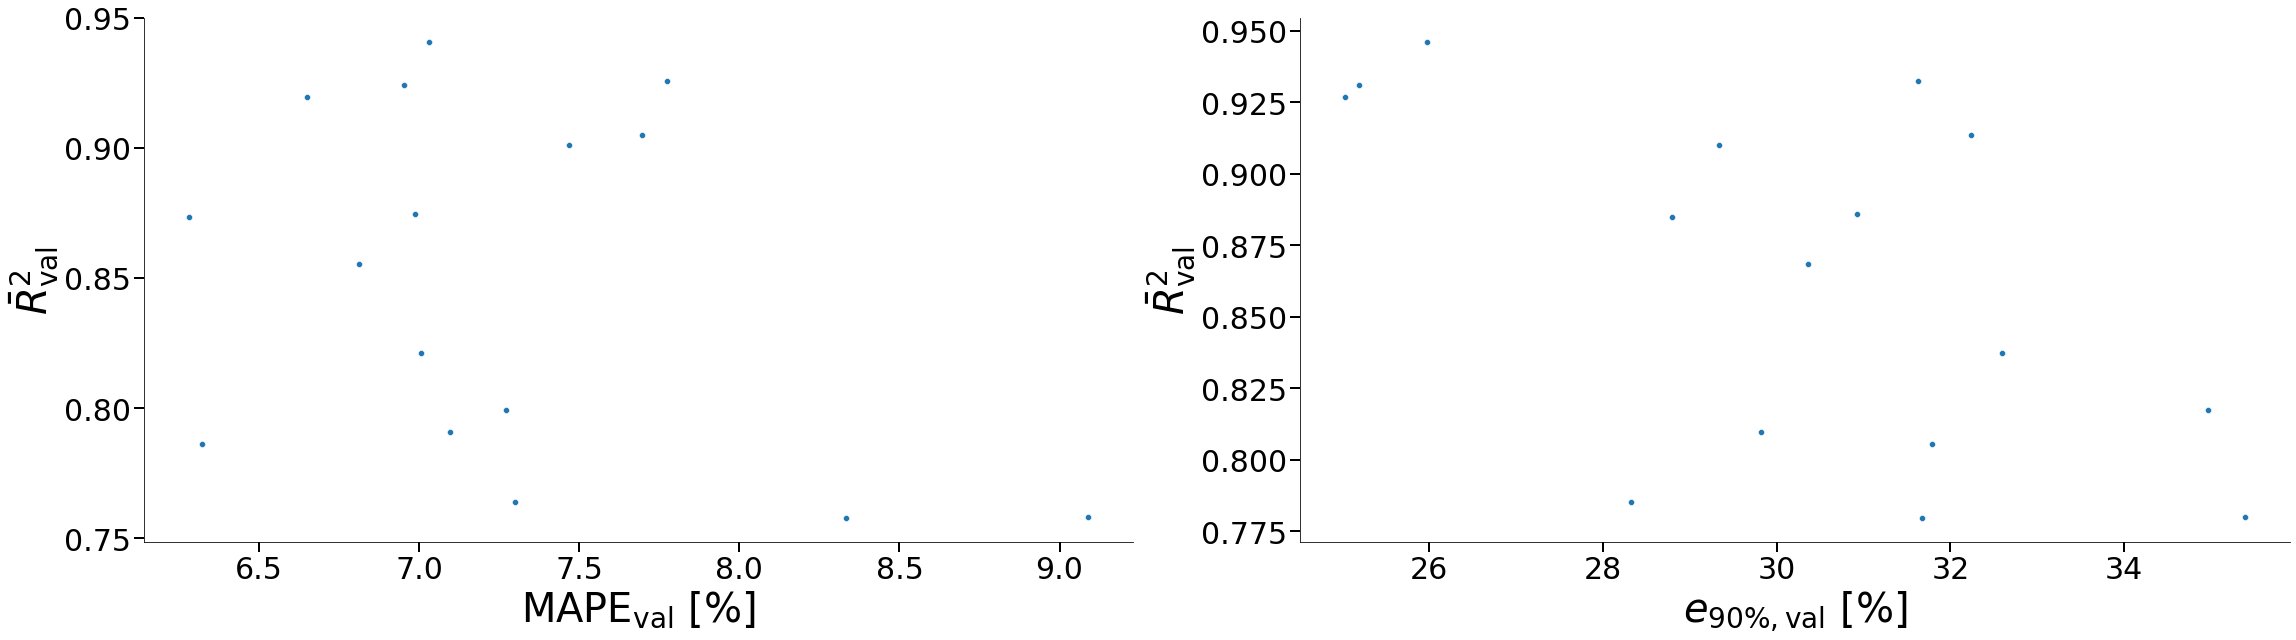

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

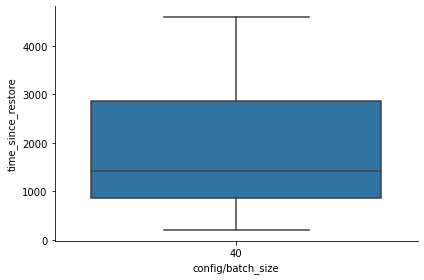

In [109]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [110]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [111]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [112]:
to_plot = df[config_columns + ['r2_adj_val']].rename(columns=config_column_labels)

In [113]:
to_plot_ow =to_plot.copy()

In [114]:
to_plot_ow

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                 relu          40      3     200       0.000098  MSE   
1                 relu          40      3     200       0.000098  MSE   
2                 relu          40      3     200       0.000098  MSE   
3                 relu          40      3     200       0.000098  MSE   
4                 relu          40      3     200       0.000098  MSE   
5                 relu          40      3     200       0.000098  MSE   
6                 relu          40      3     200       0.000098  MSE   
7                 relu          40      3     200       0.000098  MSE   
8                 relu          40      3     200       0.000098  MSE   
9                 relu          40      3     200       0.000098  MSE   
10                relu          40      3     200       0.000098  MSE   
11                relu          40      3     200       0.000098  MSE   
12                relu          40      3     200       0.000098  MSE   
13                relu          40      3     200       0.000098  MSE   
14                relu          40      3     200       0.000098  MSE   
15                relu          40      3     200       0.000098  MSE   

                                            optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
5   <class 'tensorflow.python.keras.optimizer_v2.a...   
6   <class 'tensorflow.python.keras.optimizer_v2.a...   
7   <class 'tensorflow.python.keras.optimizer_v2.a...   
8   <class 'tensorflow.python.keras.optimizer_v2.a...   
9   <class 'tensorflow.python.keras.optimizer_v2.a...   
10  <class 'tensorflow.python.keras.optimizer_v2.a...   
11  <class 'tensorflow.python.keras.optimizer_v2.a...   
12  <class 'tensorflow.python.keras.optimizer_v2.a...   
13  <class 'tensorflow.python.keras.optimizer_v2.a...   
14  <class 'tensorflow.python.keras.optimizer_v2.a...   
15  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                       preprocessor_x  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
5   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
6   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
7   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
8   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
9   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
10  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
11  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
13  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                       preprocessor_y  training_repetitions  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     1   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     2   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     3   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     4   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     5   
5   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     6   
6   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     7   
7   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     8   
8   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     9   
9   <mllib.model.minmaxscaler.A

/tmp/ipykernel_12995/72341688.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/tmp/ipykernel_12995/72341688.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


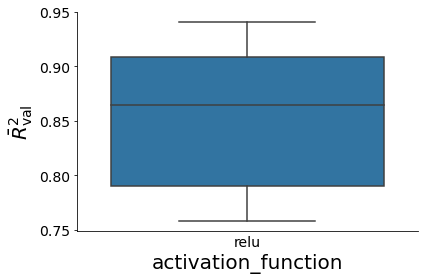

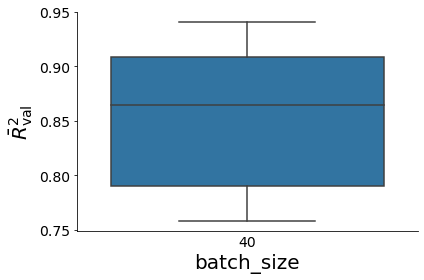

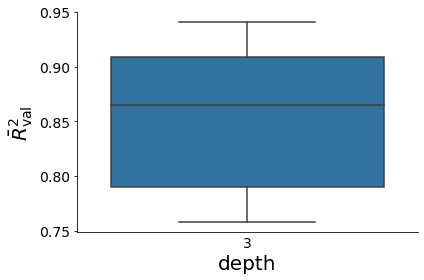

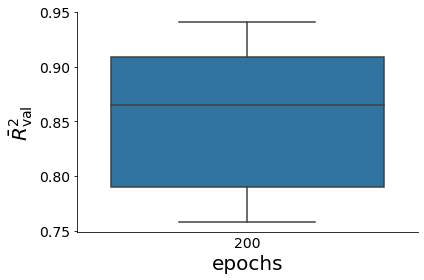

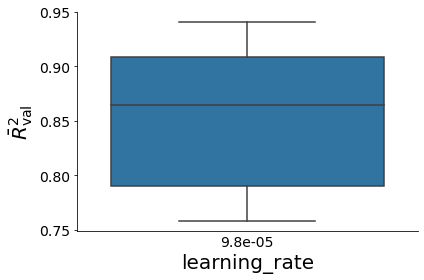

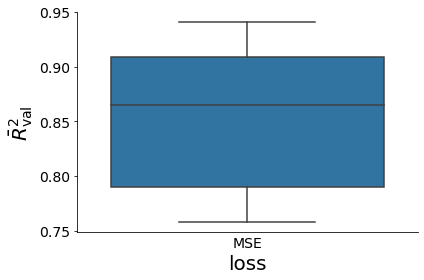

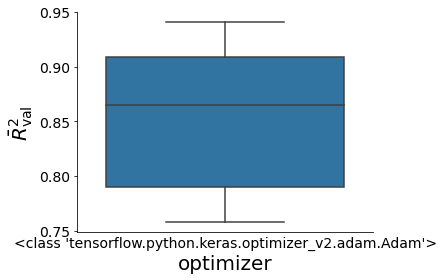

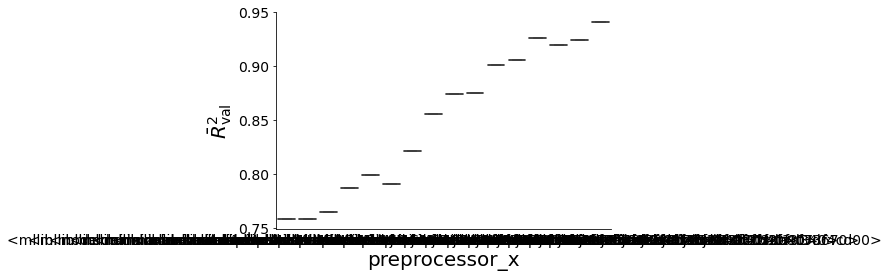

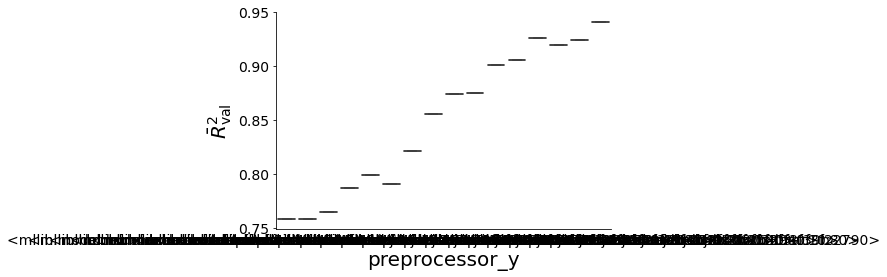

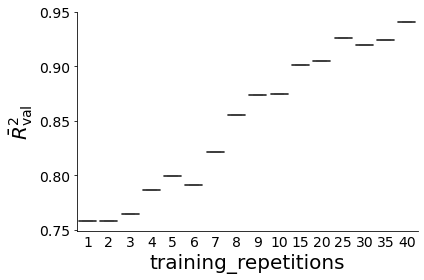

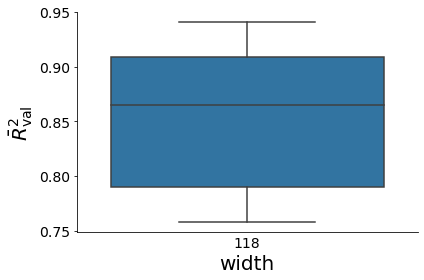

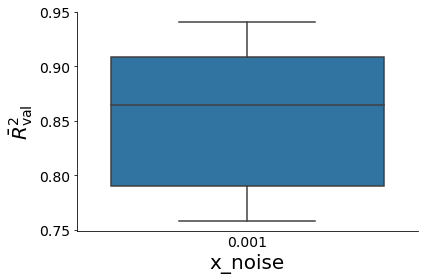

In [115]:
for param in to_plot.columns:
    if param == 'r2_adj_val':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [116]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [117]:
df[config_columns + ['r2_adj_val']]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                 40             3            200   
1                        relu                 40             3            200   
2                        relu                 40             3            200   
3                        relu                 40             3            200   
4                        relu                 40             3            200   
5                        relu                 40             3            200   
6                        relu                 40             3            200   
7                        relu                 40             3            200   
8                        relu                 40             3            200   
9                        relu                 40             3            200   
10                       relu                 40             3            200   
11                       relu                 40             3            200   
12                       relu                 40             3            200   
13                       relu                 40             3            200   
14                       relu                 40             3            200   
15                       relu                 40             3            200   

    config/learning_rate config/loss  \
0               0.000098         MSE   
1               0.000098         MSE   
2               0.000098         MSE   
3               0.000098         MSE   
4               0.000098         MSE   
5               0.000098         MSE   
6               0.000098         MSE   
7               0.000098         MSE   
8               0.000098         MSE   
9               0.000098         MSE   
10              0.000098         MSE   
11              0.000098         MSE   
12              0.000098         MSE   
13              0.000098         MSE   
14              0.000098         MSE   
15              0.000098         MSE   

                                     config/optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
5   <class 'tensorflow.python.keras.optimizer_v2.a...   
6   <class 'tensorflow.python.keras.optimizer_v2.a...   
7   <class 'tensorflow.python.keras.optimizer_v2.a...   
8   <class 'tensorflow.python.keras.optimizer_v2.a...   
9   <class 'tensorflow.python.keras.optimizer_v2.a...   
10  <class 'tensorflow.python.keras.optimizer_v2.a...   
11  <class 'tensorflow.python.keras.optimizer_v2.a...   
12  <class 'tensorflow.python.keras.optimizer_v2.a...   
13  <class 'tensorflow.python.keras.optimizer_v2.a...   
14  <class 'tensorflow.python.keras.optimizer_v2.a...   
15  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
5   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
6   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
7   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
8   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
9   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
10  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
11  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
13  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

    

In [118]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [119]:
len(config_columns)

12

In [120]:
len(config_column_labels)

12

In [121]:
to_plot = df[config_columns + ['r2_adj_val']].copy()
to_plot['r2_adj_val'], bins = pd.cut(df['r2_adj_val'], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot['r2_adj_val'] = pd.cut(df['r2_adj_val'], 5, retbins=False, labels=mean_points)

In [122]:
to_plot['r2_adj_val']


/data/user/boiger_r/python_env/aerosol_env_mie/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0     0.775929
1     0.775929
2     0.775929
3     0.775929
4     0.812656
5     0.775929
6     0.812656
7     0.849292
8     0.885927
9     0.885927
10    0.885927
11    0.922562
12    0.922562
13    0.922562
14    0.922562
15    0.922562
Name: r2_adj_val, dtype: category
Categories (5, float64): [0.775929 < 0.812656 < 0.849292 < 0.885927 < 0.922562]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


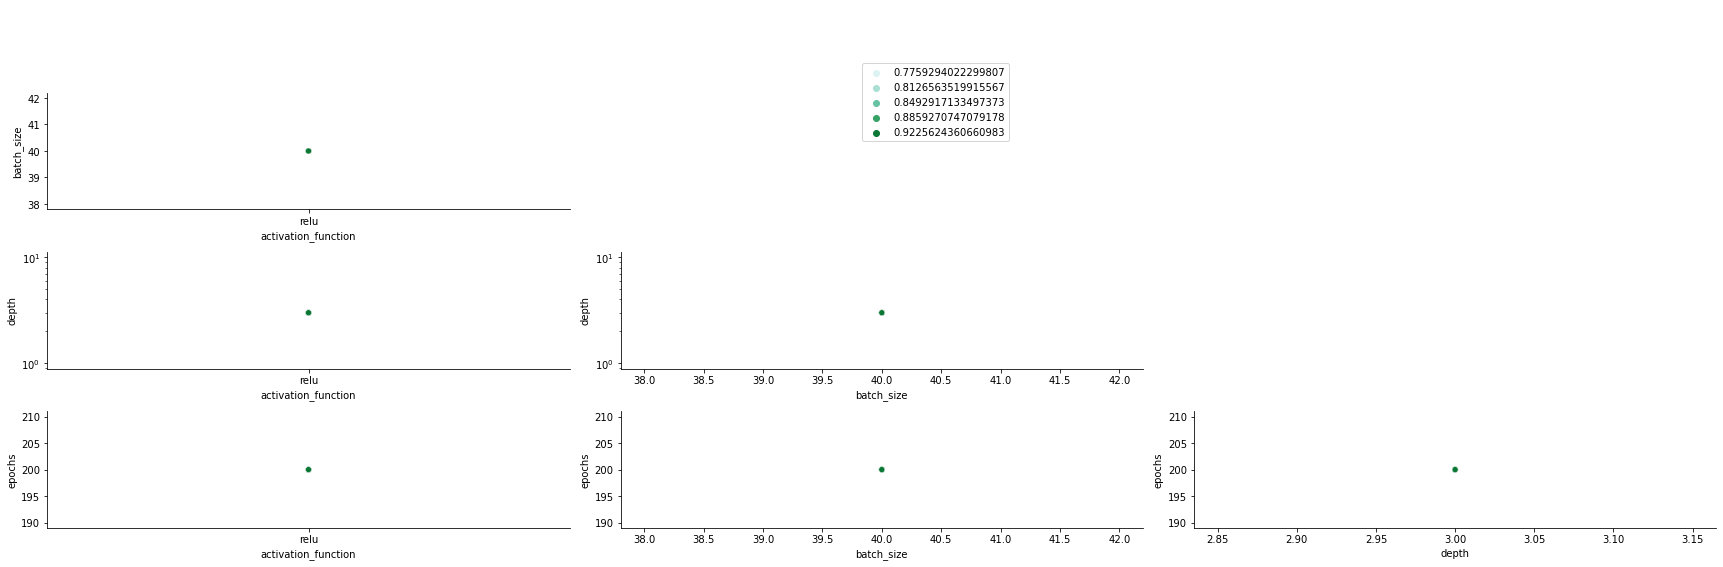

In [123]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot['r2_adj_val'].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot['r2_adj_val'].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [162]:
best_config = df.sort_values('r2_val', ascending=False).iloc[0, :]

In [143]:
df.sort_values('r2_val', ascending=False)[config_columns + ['r2_train', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
15                relu          40      3     200       0.000098  MSE   
12                relu          40      3     200       0.000098  MSE   
14                relu          40      3     200       0.000098  MSE   
13                relu          40      3     200       0.000098  MSE   
11                relu          40      3     200       0.000098  MSE   
10                relu          40      3     200       0.000098  MSE   
9                 relu          40      3     200       0.000098  MSE   
8                 relu          40      3     200       0.000098  MSE   
7                 relu          40      3     200       0.000098  MSE   
6                 relu          40      3     200       0.000098  MSE   
4                 relu          40      3     200       0.000098  MSE   
5                 relu          40      3     200       0.000098  MSE   
3                 relu          40      3     200       0.000098  MSE   
2                 relu          40      3     200       0.000098  MSE   
0                 relu          40      3     200       0.000098  MSE   
1                 relu          40      3     200       0.000098  MSE   

                                            optimizer  \
15  <class 'tensorflow.python.keras.optimizer_v2.a...   
12  <class 'tensorflow.python.keras.optimizer_v2.a...   
14  <class 'tensorflow.python.keras.optimizer_v2.a...   
13  <class 'tensorflow.python.keras.optimizer_v2.a...   
11  <class 'tensorflow.python.keras.optimizer_v2.a...   
10  <class 'tensorflow.python.keras.optimizer_v2.a...   
9   <class 'tensorflow.python.keras.optimizer_v2.a...   
8   <class 'tensorflow.python.keras.optimizer_v2.a...   
7   <class 'tensorflow.python.keras.optimizer_v2.a...   
6   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
5   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   

                                       preprocessor_x  \
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
13  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
11  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
10  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
9   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
8   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
7   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
6   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
4   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
5   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
0   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
1   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                       preprocessor_y  training_repetitions  \
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    40   
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    25   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    35   
13  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    30   
11  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    20   
10  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    15   
9   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    10   
8   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     9   
7   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     8   
6   <mllib.model.minmaxscaler.A

In [144]:
best_config.name

12

In [145]:
best_config['trial_id']

'e77d0_00012'

# Worst configs

In [146]:
df.sort_values('r2_adj_val', ascending=True)[config_columns + ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function  batch_size  depth  epochs  learning_rate loss  \
1                relu          40      3     200       0.000098  MSE   
0                relu          40      3     200       0.000098  MSE   
2                relu          40      3     200       0.000098  MSE   
3                relu          40      3     200       0.000098  MSE   
5                relu          40      3     200       0.000098  MSE   

                                           optimizer  \
1  <class 'tensorflow.python.keras.optimizer_v2.a...   
0  <class 'tensorflow.python.keras.optimizer_v2.a...   
2  <class 'tensorflow.python.keras.optimizer_v2.a...   
3  <class 'tensorflow.python.keras.optimizer_v2.a...   
5  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
1  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
5  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
1  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     2   
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     1   
2  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     3   
3  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     4   
5  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                     6   

   width  x_noise  r2_adj_val  MAPE_val  median_percentile_max_error_val  \
1    118    0.001    0.757703  8.333083                        10.191580   
0    118    0.001    0.758241  9.090384                         9.100940   
2    118    0.001    0.764150  7.299950                         8.146341   
3    118    0.001    0.786428  6.319693                         6.869195   
5    118    0.001    0.790842  7.095872                         6.848742   

   90_percentile_max_error_val  
1                    31.677771  
0                    35.386323  
2                    28.324768  
3                    31.784622  
5                    29.821104

In [147]:
df

MAE_train    MAE_val  MAPE_train  MAPE_val    MSE_train      MSE_val  \
0   25.323090  25.826068    8.869775  9.090384  4418.292420  4543.258006   
1   32.094133  32.641924    8.324400  8.333083  6959.937822  6975.468720   
2   20.886646  21.319761    7.623561  7.299950  3616.848746  3736.159985   
3   21.642032  22.573736    6.983339  6.319693  3573.282587  3810.696782   
4   26.128209  27.249048    7.932288  7.272345  4412.543873  4741.875975   
5   26.648697  27.487148    7.134079  7.095872  4894.289702  5282.568245   
6   26.256152  26.629467    6.349438  7.006263  5252.390525  5312.269880   
7   20.510969  21.032101    5.921069  6.811678  3528.948643  3617.917887   
8   18.457456  19.127425    5.877364  6.280912  3063.968049  3384.448698   
9   21.000260  21.546487    6.065830  6.986031  3546.189374  3886.693369   
10  16.892779  18.005789    6.195914  7.467550  2634.639373  3190.608851   
11  15.591402  16.483005    6.237543  7.696086  2413.334562  2890.435047   
12  14.068053  15.156775    6.159297  7.774819  1958.242681  2444.926602   
13  15.121700  16.366803    5.572642  6.648687  1890.699744  2434.052996   
14  15.946773  17.216952    5.943036  6.953195  1850.126189  2446.097993   
15  17.830565  19.198316    6.243340  7.029636  2367.404646  2914.671976   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            9.194321                         9.100940   
1                           10.511631                        10.191580   
2                            8.099317                         8.146341   
3                            6.770098                         6.869195   
4                            7.567605                         7.582113   
5                            6.915642                         6.848742   
6                            7.197050                         6.912783   
7                            6.226028                         6.034746   
8                            6.284560                         6.129886   
9                            6.737303                         6.692106   
10                           5.627513                         5.608696   
11                           5.816261                         5.701652   
12                           6.407612                         6.134796   
13                           6.053716                         5.967535   
14                           5.627315                         5.587991   
15                           5.476734                         5.656990   

    90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                       35.375767                    35.386323  ...   
1                       31.584043                    31.677771  ...   
2                       28.657214                    28.324768  ...   
3                       32.079278                    31.784622  ...   
4                       34.686868                    34.962222  ...   
5                       29.324599                    29.821104  ...   
6                       28.988736                    32.592661  ...   
7                       28.684418                    30.357042  ...   
8                       28.183606                    28.799967  ...   
9                       32.411449                    30.926984  ...   
10                      28.361778                    29.336150  ...   
11                      32.188359                    32.231299  ...   
12                      30.025906                    31.630137  ...   
13                      24.730746                    25.034681  ...   
14                      24.526187                    25.193762  ...   
15                      24.884371                    25.980824  ...   

    config/epochs  config/learning_rate  config/loss  \
0             200              0.000098          MSE   
1             200              0.000098          MSE   
2             200              0.000098          MSE   
3             200   

# Copy the best model to the models directory

In [148]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [149]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1/models'

In [150]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

FileExistsError: [Errno 17] File exists: '/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1/models/forward_model'

# Closer look w. r. t. overfitting

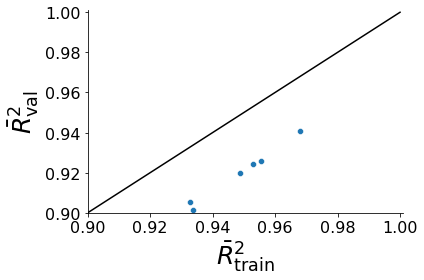

In [151]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.90, 1.001])
ax.set_ylim([0.90, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [152]:
df[df['r2_adj_train'] > 0.95]

MAE_train    MAE_val  MAPE_train  MAPE_val    MSE_train      MSE_val  \
12  14.068053  15.156775    6.159297  7.774819  1958.242681  2444.926602   
14  15.946773  17.216952    5.943036  6.953195  1850.126189  2446.097993   
15  17.830565  19.198316    6.243340  7.029636  2367.404646  2914.671976   

    median_percentile_max_error_train  median_percentile_max_error_val  \
12                           6.407612                         6.134796   
14                           5.627315                         5.587991   
15                           5.476734                         5.656990   

    90_percentile_max_error_train  90_percentile_max_error_val  ...  \
12                      30.025906                    31.630137  ...   
14                      24.526187                    25.193762  ...   
15                      24.884371                    25.980824  ...   

    config/epochs  config/learning_rate  config/loss  \
12            200              0.000098          MSE   
14            200              0.000098          MSE   
15            200              0.000098          MSE   

                                     config/optimizer  \
12  <class 'tensorflow.python.keras.optimizer_v2.a...   
14  <class 'tensorflow.python.keras.optimizer_v2.a...   
15  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                config/preprocessor_y  \
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
14  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

    config/training_repetitions  config/width  config/x_noise  \
12                           25           118           0.001   
14                           35           118           0.001   
15                           40           118           0.001   

                                               logdir  
12  /data/project/general/aerosolretriev/aerosol_r...  
14  /data/project/general/aerosolretriev/aerosol_r...  
15  /data/project/general/aerosolretriev/aerosol_r...  

[3 rows x 44 columns]

In [153]:
# LOad history of best config

In [154]:
best_model_folder = best_config['trial_id']

In [155]:
best_model_folder

'e77d0_00012'

In [156]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1'

In [157]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

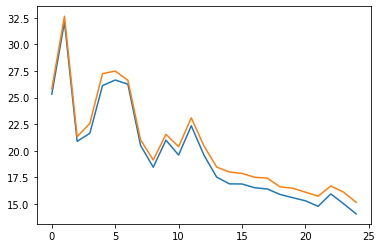

In [158]:
plt.plot(best_model_hist['MAE_train'])
plt.plot(best_model_hist['MAE_val'])

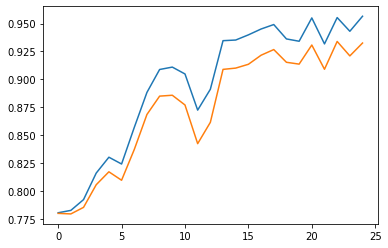

In [159]:
plt.plot(best_model_hist['r2_train'])
plt.plot(best_model_hist['r2_val'])

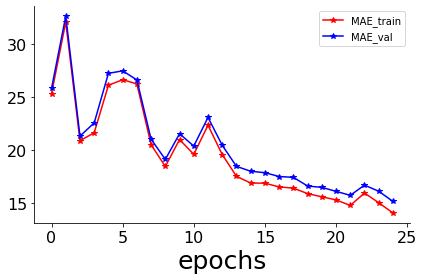

In [160]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [161]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

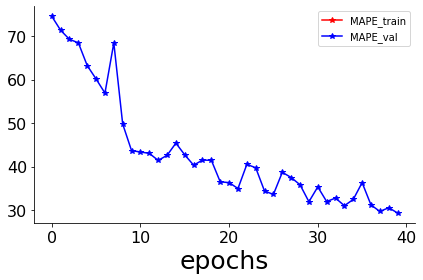

In [91]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

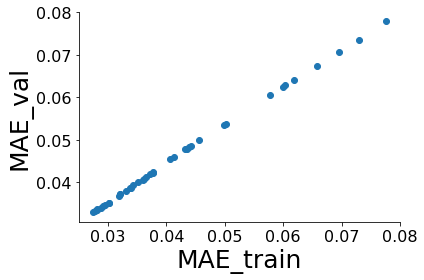

In [92]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

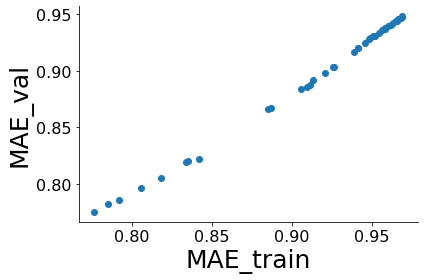

In [93]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [94]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                 40             3            200   
1                        relu                 40             3            200   
2                        relu                 40             3            200   
3                        relu                 40             3            200   
4                        relu                 40             3            200   
5                        relu                 40             3            200   
6                        relu                 40             3            200   
7                        relu                 40             3            200   
8                        relu                 40             3            200   
9                        relu                 40             3            200   
10                       relu                 40             3            200   
11                       relu                 40             3            200   
12                       relu                 40             3            200   
13                       relu                 40             3            200   
14                       relu                 40             3            200   
15                       relu                 40             3            200   

    config/learning_rate config/loss  \
0               0.000098         MSE   
1               0.000098         MSE   
2               0.000098         MSE   
3               0.000098         MSE   
4               0.000098         MSE   
5               0.000098         MSE   
6               0.000098         MSE   
7               0.000098         MSE   
8               0.000098         MSE   
9               0.000098         MSE   
10              0.000098         MSE   
11              0.000098         MSE   
12              0.000098         MSE   
13              0.000098         MSE   
14              0.000098         MSE   
15              0.000098         MSE   

                                     config/optimizer  \
0   <class 'tensorflow.python.keras.optimizer_v2.a...   
1   <class 'tensorflow.python.keras.optimizer_v2.a...   
2   <class 'tensorflow.python.keras.optimizer_v2.a...   
3   <class 'tensorflow.python.keras.optimizer_v2.a...   
4   <class 'tensorflow.python.keras.optimizer_v2.a...   
5   <class 'tensorflow.python.keras.optimizer_v2.a...   
6   <class 'tensorflow.python.keras.optimizer_v2.a...   
7   <class 'tensorflow.python.keras.optimizer_v2.a...   
8   <class 'tensorflow.python.keras.optimizer_v2.a...   
9   <class 'tensorflow.python.keras.optimizer_v2.a...   
10  <class 'tensorflow.python.keras.optimizer_v2.a...   
11  <class 'tensorflow.python.keras.optimizer_v2.a...   
12  <class 'tensorflow.python.keras.optimizer_v2.a...   
13  <class 'tensorflow.python.keras.optimizer_v2.a...   
14  <class 'tensorflow.python.keras.optimizer_v2.a...   
15  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                config/preprocessor_x  \
0   <mllib.model.preprocessor.DummyPreprocessor ob...   
1   <mllib.model.preprocessor.DummyPreprocessor ob...   
2   <mllib.model.preprocessor.DummyPreprocessor ob...   
3   <mllib.model.preprocessor.DummyPreprocessor ob...   
4   <mllib.model.preprocessor.DummyPreprocessor ob...   
5   <mllib.model.preprocessor.DummyPreprocessor ob...   
6   <mllib.model.preprocessor.DummyPreprocessor ob...   
7   <mllib.model.preprocessor.DummyPreprocessor ob...   
8   <mllib.model.preprocessor.DummyPreprocessor ob...   
9   <mllib.model.preprocessor.DummyPreprocessor ob...   
10  <mllib.model.preprocessor.DummyPreprocessor ob...   
11  <mllib.model.preprocessor.DummyPreprocessor ob...   
12  <mllib.model.preprocessor.DummyPreprocessor ob...   
13  <mllib.model.preprocessor.DummyPreprocessor ob...   
14  <mllib.model.preprocessor.DummyPreprocessor ob...   
15  <mllib.model.preprocessor.DummyPreprocessor ob...   

    

In [95]:
to_plot_ow.columns

Index(['activation_function', 'batch_size', 'depth', 'epochs', 'learning_rate',
       'loss', 'optimizer', 'preprocessor_x', 'preprocessor_y',
       'training_repetitions', 'width', 'x_noise', 'r2_adj_val'],
      dtype='object')

# create overview plot

In [96]:
best_config

MAE_train                                                                     0.028017
MAE_val                                                                       0.033454
MAPE_train                                                                         inf
MAPE_val                                                                     29.353638
MSE_train                                                                     0.002584
MSE_val                                                                       0.004361
median_percentile_max_error_train                                            19.372183
median_percentile_max_error_val                                              21.238195
90_percentile_max_error_train                                               137.293564
90_percentile_max_error_val                                                 197.692429
r2_train                                                                      0.969011
r2_val                                     

KeyError: 'config/lr'

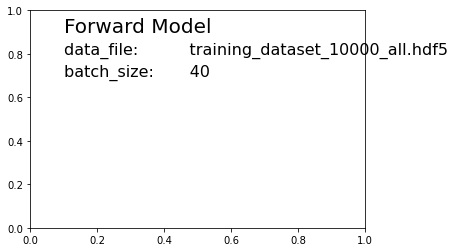

In [97]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'lr', 'width']

for param in plot_columns_list:
    if param == 'r2_adj_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_adj_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [ ]:
best_config_df = pd.DataFrame(best_config)

In [ ]:
best_config_df = best_config_df.T
best_config_df

In [98]:
best_config_df.columns

NameError: name 'best_config_df' is not defined

In [99]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

NameError: name 'best_config_df' is not defined

In [100]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/results_data_MP/trial9_April_20/DS10000_1_all/models'